In [1]:
%matplotlib inline
import sys
import os
import csv
import json
import logging
from pathlib import Path
import random
import tarfile
import tempfile
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import plotly.graph_objects as go
sys.path.append(str(Path.cwd().parent))

In [2]:
dataset = Path.cwd().parent/"input/bert-tags-results/BERT_model_results_tags.csv"

In [3]:
BERT_dataset = pd.read_csv(dataset)

In [4]:
BERT_dataset

,id,True Label,Label,Proba,Community,Multi/Uni,Text
0,16395,1,0,0.429417,Disable,multi,handjobs sold seperately
1,37405,1,0,0.489593,Women,multi,introducing fidget spinner for women
2,94180,1,1,0.897919,LGBT,uni,happy pride month let's go beat up lesbians
3,54321,1,0,0.271455,Black,multi,laughs in [majority of u.s crime rate]
4,97015,1,0,0.385270,Musulman,multi,finds out those 72 virgins.. are goats
...,...,...,...,...,...,...,...
995,3869,0,0,0.073661,Not Applicable,multi,a mother's love for the child is a divine thing
996,23817,0,0,0.373033,Not Applicable,uni,sea monkeys
997,56280,0,0,0.200106,Not Applicable,multi,little miss muffet sat on her tuffet
998,29384,0,0,0.152466,Not Applicable,multi,they're in a row


# Looking at the number of sample:

Hateful (1) or Note Hateful (0)

In [5]:
not_hateful_labels = BERT_dataset[BERT_dataset['True Label'] == 0]
hateful_labels = BERT_dataset[BERT_dataset['True Label'] == 1]

In [6]:
numb_not_hateful_labels = len(not_hateful_labels)
numb_hateful_labels = len(hateful_labels)

print("Number of none hateful samples in the dataset: ", numb_not_hateful_labels)
print("Number of hateful samples in the dataset: ",numb_hateful_labels)

Number of none hateful samples in the dataset:  501
Number of hateful samples in the dataset:  499


Uni or Multi

In [7]:
multi_sample = BERT_dataset[BERT_dataset['Multi/Uni'] == 'multi']
uni_sample = BERT_dataset[BERT_dataset['Multi/Uni'] == 'uni']

In [8]:
numb_multi_sample = len(multi_sample)
numb_uni_sample = len(uni_sample)

print("Number of multimodal samples in the dataset: ", numb_multi_sample)
print("Number of unimodal samples in the dataset: ", numb_uni_sample)

Number of multimodal samples in the dataset:  724
Number of unimodal samples in the dataset:  275


How many Hateful and not Hateful samples than are also multimodal sample?

In [9]:
Multi_and_0 = len(multi_sample[multi_sample['True Label'] == 0])
Multi_and_1= len(multi_sample[multi_sample['True Label'] == 1])

multi_labels = {
'Multi and 0' : Multi_and_0,
'Multi and 1': Multi_and_1}

multi_labels

{'Multi and 0': 295, 'Multi and 1': 429}

How many Hateful and not Hateful samples than are also unimodal sample?


In [10]:
Uni_and_0 = len(uni_sample[uni_sample['True Label'] == 0])
Uni_and_1= len(uni_sample[uni_sample['True Label'] == 1])

uni_labels = {
'Uni and 0' : Uni_and_0,
'Uni and 1': Uni_and_1}

uni_labels

{'Uni and 0': 205, 'Uni and 1': 70}

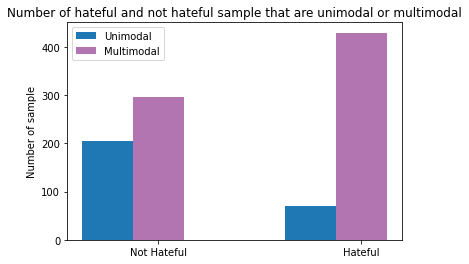

In [11]:
N = 2
ind = np.arange(N) 
width = 0.25
  
xvals = [Uni_and_0, Uni_and_1]
bar1 = plt.bar(ind, xvals, width, color = 'tab:blue')
  
yvals = [Multi_and_0, Multi_and_1]
bar2 = plt.bar(ind+width, yvals, width, color=(0.5,0.1,0.5,0.6))
  
  
plt.ylabel('Number of sample')
plt.title("Number of hateful and not hateful sample that are unimodal or multimodal")
  
plt.xticks(ind+width,['Not Hateful', 'Hateful'])
plt.legend( (bar1, bar2), ('Unimodal', 'Multimodal') )
plt.show()

# For each category 

* Disable
* Women
* LGBT
* Black
* Musulman
* Fake News
* N/A
* Inciting Violence
* Transgender
* Ginger
* Immigrant
* Jewish
* People of Color
* White
* Indian
* Japanese
* Chinese 
* Asian
* Politic
* German
* Romania
* Christian

In [12]:
Disable_sample = BERT_dataset[BERT_dataset['Community'] == 'Disable']
Women_sample = BERT_dataset[BERT_dataset['Community'] == 'Women']
LGBT_sample = BERT_dataset[BERT_dataset['Community'] == 'LGBT']
Black_sample = BERT_dataset[BERT_dataset['Community'] == 'Black']
Musulman_sample = BERT_dataset[BERT_dataset['Community'] == 'Musulman']
FakeNews_sample = BERT_dataset[BERT_dataset['Community'] == 'Fake News']
NA_sample = BERT_dataset[BERT_dataset['Community'] == 'Not Applicable']
IncitingViolence_sample = BERT_dataset[BERT_dataset['Community'] == 'Inciting Violence']
Transgender_sample = BERT_dataset[BERT_dataset['Community'] == 'Transgender']
Ginger_sample = BERT_dataset[BERT_dataset['Community'] == 'Ginger']
Immigrant_sample = BERT_dataset[BERT_dataset['Community'] == 'Immigrant']
Jewish_sample = BERT_dataset[BERT_dataset['Community'] == 'Jewish']
PeopleofColor_sample = BERT_dataset[BERT_dataset['Community'] == 'People of Color']
White_sample = BERT_dataset[BERT_dataset['Community'] == 'White']
Indian_sample = BERT_dataset[BERT_dataset['Community'] == 'Indian']
Japanese_sample = BERT_dataset[BERT_dataset['Community'] == 'Japanese']
Chinese_sample = BERT_dataset[BERT_dataset['Community'] == 'Chinese']
Asian_sample = BERT_dataset[BERT_dataset['Community'] == 'Asian']
Politic_sample = BERT_dataset[BERT_dataset['Community'] == 'Politic']
German_sample = BERT_dataset[BERT_dataset['Community'] == 'German']
Romanian_sample = BERT_dataset[BERT_dataset['Community'] == 'Romania']
Christian_sample = BERT_dataset[BERT_dataset['Community'] == 'Christian']

In [13]:
numb_Disable_sample = len(Disable_sample)
numb_Women_sample = len(Women_sample)
numb_LGBT_sample = len(LGBT_sample)
numb_Black_sample = len(Black_sample)
numb_Musulman_sample = len(Musulman_sample)
numb_FakeNews_sample = len(FakeNews_sample)
numb_NA_sample = len(NA_sample)
numb_IncitingViolence_sample = len(IncitingViolence_sample)
numb_Transgender_sample = len(Transgender_sample)
numb_German_sample = len(Ginger_sample)
numb_Immigrant_sample = len(Immigrant_sample)
numb_Jewish_sample = len(Jewish_sample)
numb_PeopleofColor_sample = len(PeopleofColor_sample)
numb_White_sample = len(White_sample)
numb_Indian_sample = len(Indian_sample)
numb_Japanese_sample = len(Japanese_sample)
numb_Chinese_sample = len(Chinese_sample)
numb_Asian_sample = len(Asian_sample)
numb_Politic_sample = len(Politic_sample)
numb_German_sample = len(German_sample)
numb_Romanian_sample = len(Romanian_sample)
numb_Christian_sample = len(Christian_sample)

Text(0, 0.5, 'number of sample')

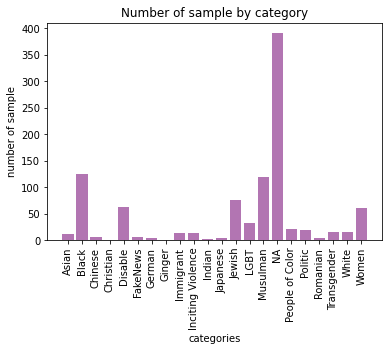

In [14]:
categories = {
'Disable' : len(Disable_sample),
'Women' : len(Women_sample),
'LGBT' : len(LGBT_sample),
'Black' : len(Black_sample),
'Musulman' : len(Musulman_sample),
'FakeNews' : len(FakeNews_sample),
'NA' : len(NA_sample),
'Inciting Violence' : len(IncitingViolence_sample),
'Transgender' : len(Transgender_sample),
'Ginger' : len(Ginger_sample),
'Immigrant' : len(Immigrant_sample),
'Jewish' : len(Jewish_sample),
'People of Color' : len(PeopleofColor_sample),
'White' : len(White_sample),
'Indian' : len(Indian_sample),
'Japanese' : len(Japanese_sample),
'Chinese' : len(Chinese_sample),
'Asian' : len(Asian_sample),
'Politic' : len(Politic_sample),
'German' : len(German_sample),
'Romanian' : len(Romanian_sample),
'Christian' : len(Christian_sample)
}

lists = sorted(categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [15]:
categories_dic = {
'Disable' : len(Disable_sample),
'Women' : len(Women_sample),
'LGBT' : len(LGBT_sample),
'Black' : len(Black_sample),
'Musulman' : len(Musulman_sample),
'FakeNews' : len(FakeNews_sample),
'NA' : len(NA_sample),
'Inciting Violence' : len(IncitingViolence_sample),
'Transgender' : len(Transgender_sample),
'Ginger' : len(Ginger_sample),
'Immigrant' : len(Immigrant_sample),
'Jewish' : len(Jewish_sample),
'People of Color' : len(PeopleofColor_sample),
'White' : len(White_sample),
'Indian' : len(Indian_sample),
'Japanese' : len(Japanese_sample),
'Chinese' : len(Chinese_sample),
'Asian' : len(Asian_sample),
'Politic' : len(Politic_sample),
'German' : len(German_sample),
'Romanian' : len(Romanian_sample),
'Christian' : len(Christian_sample)
}
categories_dic

{'Disable': 62,
 'Women': 60,
 'LGBT': 32,
 'Black': 125,
 'Musulman': 119,
 'FakeNews': 6,
 'NA': 391,
 'Inciting Violence': 14,
 'Transgender': 15,
 'Ginger': 1,
 'Immigrant': 13,
 'Jewish': 75,
 'People of Color': 21,
 'White': 15,
 'Indian': 2,
 'Japanese': 3,
 'Chinese': 6,
 'Asian': 11,
 'Politic': 19,
 'German': 3,
 'Romanian': 3,
 'Christian': 1}

In [16]:
OtherThanNA_sample = BERT_dataset[BERT_dataset['Community'] != 'Not Applicable']

Text(0, 0.5, 'number of sample')

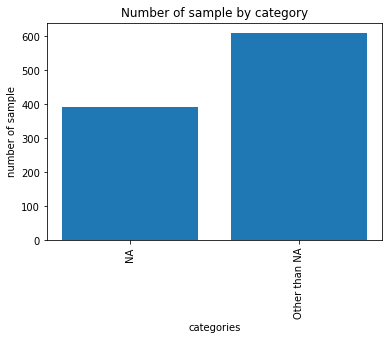

In [17]:
bi_cat = {
    'NA' : len(NA_sample),
    'Other than NA' : len(OtherThanNA_sample)
}

lists = sorted(bi_cat.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
plt.bar(categories, numb_of_sample, color="tab:blue")
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [18]:
bi_cat

{'NA': 391, 'Other than NA': 609}

Hateful by community 

In [19]:
Disable_sample_h = hateful_labels[hateful_labels['Community'] == 'Disable']
Women_sample_h = hateful_labels[hateful_labels['Community'] == 'Women']
LGBT_sample_h = hateful_labels[hateful_labels['Community'] == 'LGBT']
Black_sample_h = hateful_labels[hateful_labels['Community'] == 'Black']
Musulman_sample_h = hateful_labels[hateful_labels['Community'] == 'Musulman']
FakeNews_sample_h = hateful_labels[hateful_labels['Community'] == 'Fake News']
NA_sample_h = hateful_labels[hateful_labels['Community'] == 'Not Applicable']
IncitingViolence_sample_h = hateful_labels[hateful_labels['Community'] == 'Inciting Violence']
Transgender_sample_h = hateful_labels[hateful_labels['Community'] == 'Transgender']
Ginger_sample_h = hateful_labels[hateful_labels['Community'] == 'Ginger']
Immigrant_sample_h = hateful_labels[hateful_labels['Community'] == 'Immigrant']
Jewish_sample_h = hateful_labels[hateful_labels['Community'] == 'Jewish']
PeopleofColor_sample_h = hateful_labels[hateful_labels['Community'] == 'People of Color']
White_sample_h = hateful_labels[hateful_labels['Community'] == 'White']
Indian_sample_h = hateful_labels[hateful_labels['Community'] == 'Indian']
Japanese_sample_h = hateful_labels[hateful_labels['Community'] == 'Japanese']
Chinese_sample_h = hateful_labels[hateful_labels['Community'] == 'Chinese']
Asian_sample_h = hateful_labels[hateful_labels['Community'] == 'Asian']
Politic_sample_h = hateful_labels[hateful_labels['Community'] == 'Politic']
German_sample_h = hateful_labels[hateful_labels['Community'] == 'German']
Romanian_sample_h = hateful_labels[hateful_labels['Community'] == 'Romania']
Christian_sample_h = hateful_labels[hateful_labels['Community'] == 'Christian']

Text(0, 0.5, 'number of sample')

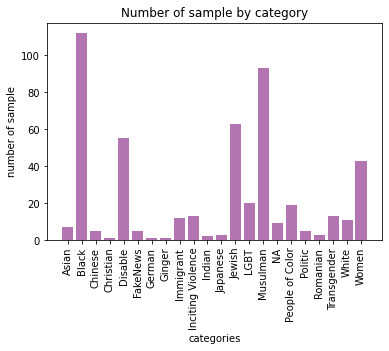

In [20]:
H_categories = {
'Disable' : len(Disable_sample_h),
'Women' : len(Women_sample_h),
'LGBT' : len(LGBT_sample_h),
'Black' : len(Black_sample_h),
'Musulman' : len(Musulman_sample_h),
'FakeNews' : len(FakeNews_sample_h),
'NA' : len(NA_sample_h),
'Inciting Violence' : len(IncitingViolence_sample_h),
'Transgender' : len(Transgender_sample_h),
'Ginger' : len(Ginger_sample_h),
'Immigrant' : len(Immigrant_sample_h),
'Jewish' : len(Jewish_sample_h),
'People of Color' : len(PeopleofColor_sample_h),
'White' : len(White_sample_h),
'Indian' : len(Indian_sample_h),
'Japanese' : len(Japanese_sample_h),
'Chinese' : len(Chinese_sample_h),
'Asian' : len(Asian_sample_h),
'Politic' : len(Politic_sample_h),
'German' : len(German_sample_h),
'Romanian' : len(Romanian_sample_h),
'Christian' : len(Christian_sample_h)
}

lists = sorted(H_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

Not Hateful by community 

In [21]:
Disable_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Disable']
Women_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Women']
LGBT_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'LGBT']
Black_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Black']
Musulman_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Musulman']
FakeNews_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Fake News']
NA_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Not Applicable']
IncitingViolence_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Inciting Violence']
Transgender_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Transgender']
Ginger_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Ginger']
Immigrant_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Immigrant']
Jewish_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Jewish']
PeopleofColor_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'People of Color']
White_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'White']
Indian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Indian']
Japanese_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Japanese']
Chinese_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Chinese']
Asian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Asian']
Politic_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Politic']
German_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'German']
Romanian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Romania']
Christian_sample_nh = not_hateful_labels[not_hateful_labels['Community'] == 'Christian']

Text(0, 0.5, 'number of sample')

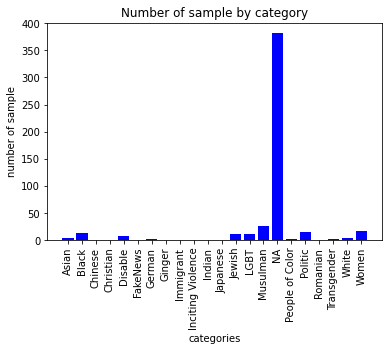

In [22]:
NH_categories = {
'Disable' : len(Disable_sample_nh),
'Women' : len(Women_sample_nh),
'LGBT' : len(LGBT_sample_nh),
'Black' : len(Black_sample_nh),
'Musulman' : len(Musulman_sample_nh),
'FakeNews' : len(FakeNews_sample_nh),
'NA' : len(NA_sample_nh),
'Inciting Violence' : len(IncitingViolence_sample_nh),
'Transgender' : len(Transgender_sample_nh),
'Ginger' : len(Ginger_sample_nh),
'Immigrant' : len(Immigrant_sample_nh),
'Jewish' : len(Jewish_sample_nh),
'People of Color' : len(PeopleofColor_sample_nh),
'White' : len(White_sample_nh),
'Indian' : len(Indian_sample_nh),
'Japanese' : len(Japanese_sample_nh),
'Chinese' : len(Chinese_sample_nh),
'Asian' : len(Asian_sample_nh),
'Politic' : len(Politic_sample_nh),
'German' : len(German_sample_nh),
'Romanian' : len(Romanian_sample_nh),
'Christian' : len(Christian_sample_nh)
}

lists = sorted(NH_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

We can see that NA is the type that is mostly not hateful - proving that hate tend to target a specific community at the opposite of not hateful.

In [23]:
H_categories

{'Disable': 55,
 'Women': 43,
 'LGBT': 20,
 'Black': 112,
 'Musulman': 93,
 'FakeNews': 5,
 'NA': 9,
 'Inciting Violence': 13,
 'Transgender': 13,
 'Ginger': 1,
 'Immigrant': 12,
 'Jewish': 63,
 'People of Color': 19,
 'White': 11,
 'Indian': 2,
 'Japanese': 3,
 'Chinese': 5,
 'Asian': 7,
 'Politic': 5,
 'German': 1,
 'Romanian': 3,
 'Christian': 1}

Graph for each communities, the percentage of, in a column not hateful, in another, hateful

In [24]:
NH_P_categories = {
'Disable' : len(Disable_sample_nh) / len(Disable_sample) * 100,
'Women' : len(Women_sample_nh) / len(Women_sample) * 100,
'LGBT' : len(LGBT_sample_nh) / len(LGBT_sample) * 100,
'Black' : len(Black_sample_nh) / len(Black_sample) * 100,
'Musulman' : len(Musulman_sample_nh) / len(Musulman_sample) * 100,
'FakeNews' : len(FakeNews_sample_nh) / len(FakeNews_sample) * 100,
'NA' : len(NA_sample_nh) / len(NA_sample) * 100,
'Inciting Violence' : len(IncitingViolence_sample_nh) / len(IncitingViolence_sample) * 100,
'Transgender' : len(Transgender_sample_nh) / len(Transgender_sample) * 100,
'Ginger' : len(Ginger_sample_nh) / len(Ginger_sample) * 100,
'Immigrant' : len(Immigrant_sample_nh) / len(Immigrant_sample) * 100,
'Jewish' : len(Jewish_sample_nh) / len(Jewish_sample) * 100,
'People of Color' : len(PeopleofColor_sample_nh) / len(PeopleofColor_sample) * 100,
'White' : len(White_sample_nh) / len(White_sample) * 100,
'Indian' : len(Indian_sample_nh) / len(Indian_sample) * 100,
'Japanese' : len(Japanese_sample_nh) / len(Japanese_sample) * 100,
'Chinese' : len(Chinese_sample_nh) / len(Chinese_sample) * 100,
'Asian' : len(Asian_sample_nh) / len(Asian_sample) * 100,
'Politic' : len(Politic_sample_nh) / len(Politic_sample) * 100,
'German' : len(German_sample_nh) / len(German_sample) * 100,
'Romanian' : len(Romanian_sample_nh) / len(Romanian_sample) * 100,
'Christian' : len(Christian_sample_nh) / len(Christian_sample) * 100
}

NH_P_categories

{'Disable': 11.29032258064516,
 'Women': 28.333333333333332,
 'LGBT': 37.5,
 'Black': 10.4,
 'Musulman': 21.84873949579832,
 'FakeNews': 16.666666666666664,
 'NA': 97.69820971867009,
 'Inciting Violence': 7.142857142857142,
 'Transgender': 13.333333333333334,
 'Ginger': 0.0,
 'Immigrant': 7.6923076923076925,
 'Jewish': 16.0,
 'People of Color': 9.523809523809524,
 'White': 26.666666666666668,
 'Indian': 0.0,
 'Japanese': 0.0,
 'Chinese': 16.666666666666664,
 'Asian': 36.36363636363637,
 'Politic': 73.68421052631578,
 'German': 66.66666666666666,
 'Romanian': 0.0,
 'Christian': 0.0}

In [25]:
H_P_categories = {
'Disable' : len(Disable_sample_h) / len(Disable_sample) * 100,
'Women' : len(Women_sample_h) / len(Women_sample) * 100,
'LGBT' : len(LGBT_sample_h) / len(LGBT_sample) * 100,
'Black' : len(Black_sample_h) / len(Black_sample) * 100,
'Musulman' : len(Musulman_sample_h) / len(Musulman_sample) * 100,
'FakeNews' : len(FakeNews_sample_h) / len(FakeNews_sample) * 100,
'NA' : len(NA_sample_h) / len(NA_sample) * 100,
'Inciting Violence' : len(IncitingViolence_sample_h) / len(IncitingViolence_sample) * 100,
'Transgender' : len(Transgender_sample_h) / len(Transgender_sample) * 100,
'Ginger' : len(Ginger_sample_h) / len(Ginger_sample) * 100,
'Immigrant' : len(Immigrant_sample_h) / len(Immigrant_sample) * 100,
'Jewish' : len(Jewish_sample_h) / len(Jewish_sample) * 100,
'People of Color' : len(PeopleofColor_sample_h) / len(PeopleofColor_sample) * 100,
'White' : len(White_sample_h) / len(White_sample) * 100,
'Indian' : len(Indian_sample_h) / len(Indian_sample) * 100,
'Japanese' : len(Japanese_sample_h) / len(Japanese_sample) * 100,
'Chinese' : len(Chinese_sample_h) / len(Chinese_sample) * 100,
'Asian' : len(Asian_sample_h) / len(Asian_sample) * 100,
'Politic' : len(Politic_sample_h) / len(Politic_sample) * 100,
'German' : len(German_sample_h) / len(German_sample) * 100,
'Romanian' : len(Romanian_sample_h) / len(Romanian_sample) * 100,
'Christian' : len(Christian_sample_h) / len(Christian_sample) * 100
}

H_P_categories

{'Disable': 88.70967741935483,
 'Women': 71.66666666666667,
 'LGBT': 62.5,
 'Black': 89.60000000000001,
 'Musulman': 78.15126050420169,
 'FakeNews': 83.33333333333334,
 'NA': 2.3017902813299234,
 'Inciting Violence': 92.85714285714286,
 'Transgender': 86.66666666666667,
 'Ginger': 100.0,
 'Immigrant': 92.3076923076923,
 'Jewish': 84.0,
 'People of Color': 90.47619047619048,
 'White': 73.33333333333333,
 'Indian': 100.0,
 'Japanese': 100.0,
 'Chinese': 83.33333333333334,
 'Asian': 63.63636363636363,
 'Politic': 26.31578947368421,
 'German': 33.33333333333333,
 'Romanian': 100.0,
 'Christian': 100.0}

In [26]:
['Asian', 36.4, 63.6], ['Black', 10.4, 89.6], ['Chinese', 16.7, 83.3], ['Christian', 0, 100], ['Disabled', 11.3, 88.7], ['FakeNews', 16.7, 83.3],
['German', 7, 33.3], ['Ginger', 0, 100], ['Inciting Violence', 7.2, 92.8], ['Indian', 0, 100], ['Immigrant', 7.7, 92.3], ['Japanese', 0, 100], 
['Jewish', 16, 84], ['LGBT', 37.5, 62.5], ['Muslim', 21.8, 78.2], ['NA', 97.7, 2.3], ['People of Color', 9.5, 90.5], ['Politic', 73.7, 26], 
['Romanian', 0, 100], ['Transgender', 13.3, 86.7],  ['White', 26.7, 73.3],  ['Women', 28.3, 71.6]


(['Romanian', 0, 100],
 ['Transgender', 13.3, 86.7],
 ['White', 26.7, 73.3],
 ['Women', 28.3, 71.6])

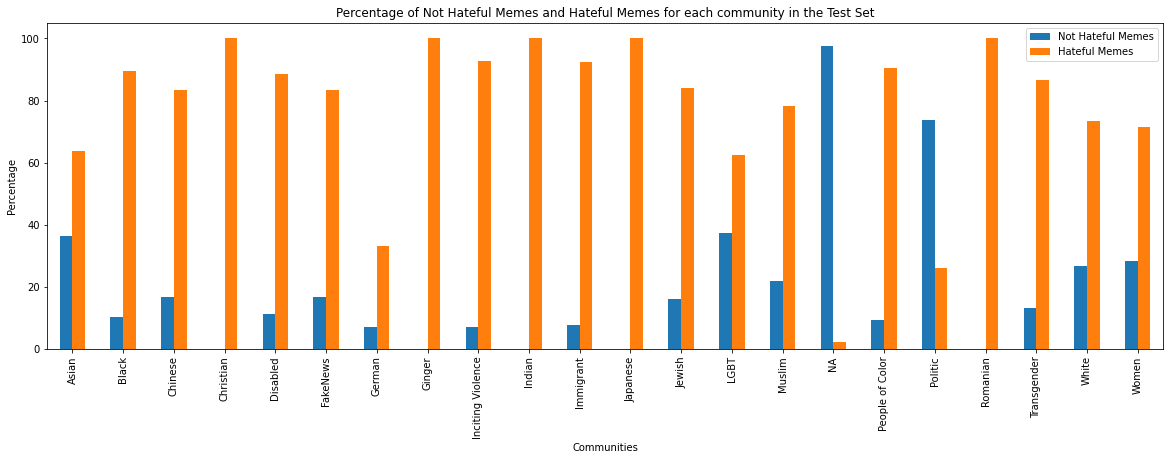

In [27]:
data_cat_HNH=[
    ['Asian', 36.4, 63.6], ['Black', 10.4, 89.6], ['Chinese', 16.7, 83.3], ['Christian', 0, 100], ['Disabled', 11.3, 88.7], ['FakeNews', 16.7, 83.3],
['German', 7, 33.3], ['Ginger', 0, 100], ['Inciting Violence', 7.2, 92.8], ['Indian', 0, 100], ['Immigrant', 7.7, 92.3], ['Japanese', 0, 100], 
['Jewish', 16, 84], ['LGBT', 37.5, 62.5], ['Muslim', 21.8, 78.2], ['NA', 97.7, 2.3], ['People of Color', 9.5, 90.5], ['Politic', 73.7, 26], 
['Romanian', 0, 100], ['Transgender', 13.3, 86.7],  ['White', 26.7, 73.3],  ['Women', 28.3, 71.6]
     ]

df_cat=pd.DataFrame(data_cat_HNH,columns=["Communities", "Not Hateful Memes", "Hateful Memes"])
df_cat.plot(x="Communities", y=["Not Hateful Memes", "Hateful Memes"], kind="bar",figsize=(20,6))
plt.title("Percentage of Not Hateful Memes and Hateful Memes for each community in the Test Set")
plt.ylabel("Percentage")
plt.show()

by Uni 

In [28]:
Disable_sample_uni = Disable_sample[Disable_sample['Multi/Uni'] == 'uni']
Women_sample_uni = Women_sample[Women_sample['Multi/Uni'] == 'uni']
LGBT_sample_uni = LGBT_sample[LGBT_sample['Multi/Uni'] == 'uni']
Black_sample_uni = Black_sample[Black_sample['Multi/Uni'] == 'uni']
Musulman_sample_uni = Musulman_sample[Musulman_sample['Multi/Uni'] == 'uni']
FakeNews_sample_uni = FakeNews_sample[FakeNews_sample['Multi/Uni'] == 'uni']
NA_sample_uni = NA_sample[NA_sample['Multi/Uni'] == 'uni']
IncitingViolence_sample_uni = IncitingViolence_sample[IncitingViolence_sample['Multi/Uni'] == 'uni']
Transgender_sample_uni = Transgender_sample[Transgender_sample['Multi/Uni'] == 'uni']
Ginger_sample_uni = Ginger_sample[Ginger_sample['Multi/Uni'] == 'uni']
Immigrant_sample_uni = Immigrant_sample[Immigrant_sample['Multi/Uni'] == 'uni']
Jewish_sample_uni = Jewish_sample[Jewish_sample['Multi/Uni'] == 'uni']
PeopleofColor_sample_uni = PeopleofColor_sample[PeopleofColor_sample['Multi/Uni'] == 'uni']
White_sample_uni = White_sample[White_sample['Multi/Uni'] == 'uni']
Indian_sample_uni = Indian_sample[Indian_sample['Multi/Uni'] == 'uni']
Japanese_sample_uni = Japanese_sample[Japanese_sample['Multi/Uni'] == 'uni']
Chinese_sample_uni = Chinese_sample[Chinese_sample['Multi/Uni'] == 'uni']
Asian_sample_uni = Asian_sample[Asian_sample['Multi/Uni'] == 'uni']
Politic_sample_uni = Politic_sample[Politic_sample['Multi/Uni'] == 'uni']
German_sample_uni = German_sample[German_sample['Multi/Uni'] == 'uni']
Romanian_sample_uni = Romanian_sample[Romanian_sample['Multi/Uni'] == 'uni']
Christian_sample_uni = Christian_sample[Christian_sample['Multi/Uni'] == 'uni']

Text(0, 0.5, 'number of sample')

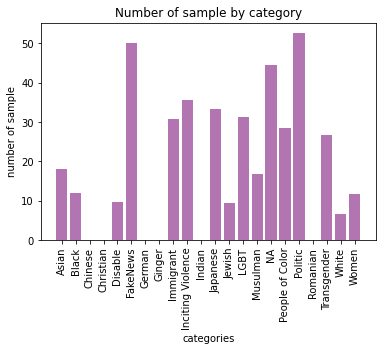

In [29]:

Uni_categories = {
'Disable' :len(Disable_sample_uni) / len(Disable_sample) * 100,
'Women' : len(Women_sample_uni) / len(Women_sample) * 100,
'LGBT' : len(LGBT_sample_uni) / len(LGBT_sample) * 100,
'Black' : len(Black_sample_uni) / len(Black_sample) * 100,
'Musulman' : len(Musulman_sample_uni) / len(Musulman_sample) * 100,
'FakeNews' : len(FakeNews_sample_uni) / len(FakeNews_sample) * 100,
'NA' : len(NA_sample_uni) / len(NA_sample) * 100,
'Inciting Violence' : len(IncitingViolence_sample_uni) / len(IncitingViolence_sample) * 100,
'Transgender' : len(Transgender_sample_uni) / len(Transgender_sample) * 100,
'Ginger' : len(Ginger_sample_uni) / len(Ginger_sample) * 100,
'Immigrant' : len(Immigrant_sample_uni) / len(Immigrant_sample) * 100,
'Jewish' : len(Jewish_sample_uni) / len(Jewish_sample) * 100,
'People of Color' : len(PeopleofColor_sample_uni) / len(PeopleofColor_sample) * 100,
'White' : len(White_sample_uni) / len(White_sample) * 100,
'Indian' : len(Indian_sample_uni) / len(Indian_sample) * 100,
'Japanese' : len(Japanese_sample_uni) / len(Japanese_sample) * 100,
'Chinese' : len(Chinese_sample_uni) / len(Chinese_sample) * 100,
'Asian' : len(Asian_sample_uni) / len(Asian_sample) * 100,
'Politic' : len(Politic_sample_uni) / len(Politic_sample) * 100,
'German' : len(German_sample_uni) / len(German_sample) * 100,
'Romanian' : len(Romanian_sample_uni) / len(Romanian_sample) * 100,
'Christian' : len(Christian_sample_uni) / len(Christian_sample) * 100
}

lists = sorted(Uni_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [30]:
Uni_categories

{'Disable': 9.67741935483871,
 'Women': 11.666666666666666,
 'LGBT': 31.25,
 'Black': 12.0,
 'Musulman': 16.80672268907563,
 'FakeNews': 50.0,
 'NA': 44.50127877237852,
 'Inciting Violence': 35.714285714285715,
 'Transgender': 26.666666666666668,
 'Ginger': 0.0,
 'Immigrant': 30.76923076923077,
 'Jewish': 9.333333333333334,
 'People of Color': 28.57142857142857,
 'White': 6.666666666666667,
 'Indian': 0.0,
 'Japanese': 33.33333333333333,
 'Chinese': 0.0,
 'Asian': 18.181818181818183,
 'Politic': 52.63157894736842,
 'German': 0.0,
 'Romanian': 0.0,
 'Christian': 0.0}

Multi

In [31]:
Disable_sample_multi = Disable_sample[Disable_sample['Multi/Uni'] == 'multi']
Women_sample_multi = Women_sample[Women_sample['Multi/Uni'] == 'multi']
LGBT_sample_multi = LGBT_sample[LGBT_sample['Multi/Uni'] == 'multi']
Black_sample_multi = Black_sample[Black_sample['Multi/Uni'] == 'multi']
Musulman_sample_multi = Musulman_sample[Musulman_sample['Multi/Uni'] == 'multi']
FakeNews_sample_multi = FakeNews_sample[FakeNews_sample['Multi/Uni'] == 'multi']
NA_sample_multi = NA_sample[NA_sample['Multi/Uni'] == 'multi']
IncitingViolence_sample_multi = IncitingViolence_sample[IncitingViolence_sample['Multi/Uni'] == 'multi']
Transgender_sample_multi = Transgender_sample[Transgender_sample['Multi/Uni'] == 'multi']
Ginger_sample_multi = Ginger_sample[Ginger_sample['Multi/Uni'] == 'multi']
Immigrant_sample_multi = Immigrant_sample[Immigrant_sample['Multi/Uni'] == 'multi']
Jewish_sample_multi = Jewish_sample[Jewish_sample['Multi/Uni'] == 'multi']
PeopleofColor_sample_multi = PeopleofColor_sample[PeopleofColor_sample['Multi/Uni'] == 'multi']
White_sample_multi = White_sample[White_sample['Multi/Uni'] == 'multi']
Indian_sample_multi = Indian_sample[Indian_sample['Multi/Uni'] == 'multi']
Japanese_sample_multi = Japanese_sample[Japanese_sample['Multi/Uni'] == 'multi']
Chinese_sample_multi = Chinese_sample[Chinese_sample['Multi/Uni'] == 'multi']
Asian_sample_multi = Asian_sample[Asian_sample['Multi/Uni'] == 'multi']
Politic_sample_multi = Politic_sample[Politic_sample['Multi/Uni'] == 'multi']
German_sample_multi = German_sample[German_sample['Multi/Uni'] == 'multi']
Romanian_sample_multi = Romanian_sample[Romanian_sample['Multi/Uni'] == 'multi']
Christian_sample_multi = Christian_sample[Christian_sample['Multi/Uni'] == 'multi']

Text(0, 0.5, 'number of sample')

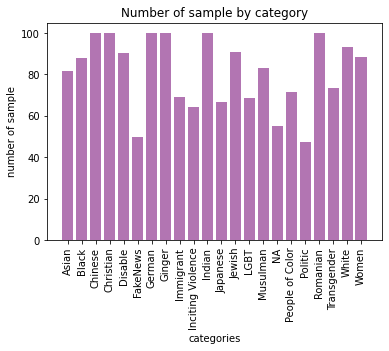

In [32]:
Multi_categories = {
'Disable' :len(Disable_sample_multi) / len(Disable_sample) * 100,
'Women' : len(Women_sample_multi) / len(Women_sample) * 100,
'LGBT' : len(LGBT_sample_multi) / len(LGBT_sample) * 100,
'Black' : len(Black_sample_multi) / len(Black_sample) * 100,
'Musulman' : len(Musulman_sample_multi) / len(Musulman_sample) * 100,
'FakeNews' : len(FakeNews_sample_multi) / len(FakeNews_sample) * 100,
'NA' : len(NA_sample_multi) / len(NA_sample) * 100,
'Inciting Violence' : len(IncitingViolence_sample_multi) / len(IncitingViolence_sample) * 100,
'Transgender' : len(Transgender_sample_multi) / len(Transgender_sample) * 100,
'Ginger' : len(Ginger_sample_multi) / len(Ginger_sample) * 100,
'Immigrant' : len(Immigrant_sample_multi) / len(Immigrant_sample) * 100,
'Jewish' : len(Jewish_sample_multi) / len(Jewish_sample) * 100,
'People of Color' : len(PeopleofColor_sample_multi) / len(PeopleofColor_sample) * 100,
'White' : len(White_sample_multi) / len(White_sample) * 100,
'Indian' : len(Indian_sample_multi) / len(Indian_sample) * 100,
'Japanese' : len(Japanese_sample_multi) / len(Japanese_sample) * 100,
'Chinese' : len(Chinese_sample_multi) / len(Chinese_sample) * 100,
'Asian' : len(Asian_sample_multi) / len(Asian_sample) * 100,
'Politic' : len(Politic_sample_multi) / len(Politic_sample) * 100,
'German' : len(German_sample_multi) / len(German_sample) * 100,
'Romanian' : len(Romanian_sample_multi) / len(Romanian_sample) * 100,
'Christian' : len(Christian_sample_multi) / len(Christian_sample) * 100
}

lists = sorted(Multi_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [33]:
Multi_categories

{'Disable': 90.32258064516128,
 'Women': 88.33333333333333,
 'LGBT': 68.75,
 'Black': 88.0,
 'Musulman': 83.19327731092437,
 'FakeNews': 50.0,
 'NA': 55.24296675191815,
 'Inciting Violence': 64.28571428571429,
 'Transgender': 73.33333333333333,
 'Ginger': 100.0,
 'Immigrant': 69.23076923076923,
 'Jewish': 90.66666666666666,
 'People of Color': 71.42857142857143,
 'White': 93.33333333333333,
 'Indian': 100.0,
 'Japanese': 66.66666666666666,
 'Chinese': 100.0,
 'Asian': 81.81818181818183,
 'Politic': 47.368421052631575,
 'German': 100.0,
 'Romanian': 100.0,
 'Christian': 100.0}

Graph for each communities, the percentage of, in a column uni, in another, multi 

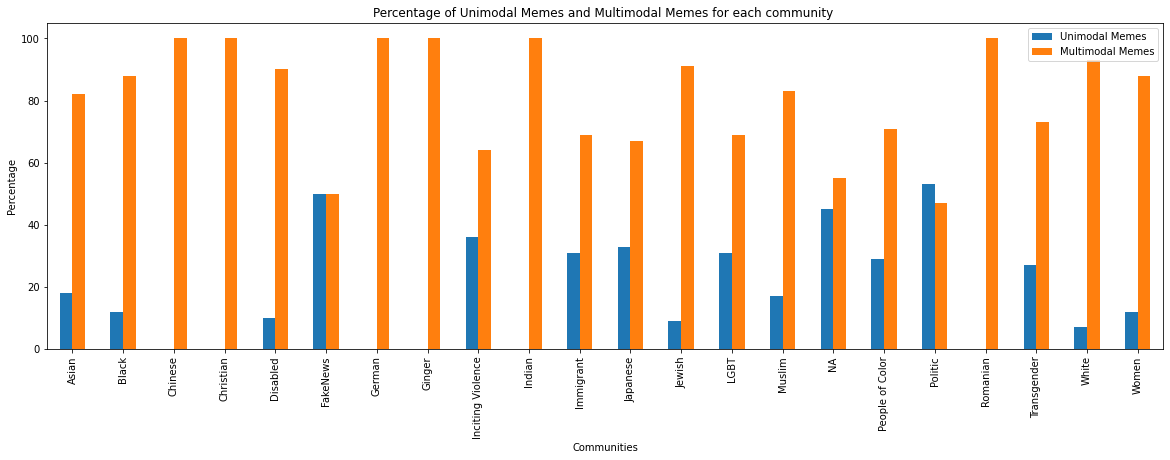

In [34]:
data_cat_UniMultil=[
    ['Asian', 18, 82], ['Black', 12, 88], ['Chinese', 0.0, 100], ['Christian', 0.0, 100], ['Disabled', 10, 90], ['FakeNews', 50, 50],
['German', 0.0, 100], ['Ginger', 0.0, 100], ['Inciting Violence', 36, 64], ['Indian', 0.0, 100], ['Immigrant', 31, 69], ['Japanese', 33, 67], 
['Jewish', 9, 91], ['LGBT', 31, 69], ['Muslim', 17, 83], ['NA', 45, 55], ['People of Color', 29, 71], ['Politic', 53, 47], 
['Romanian', 0.0, 100], ['Transgender', 27, 73],  ['White', 7, 93],  ['Women', 12, 88]
     ]

df_cat=pd.DataFrame(data_cat_UniMultil,columns=["Communities", "Unimodal Memes", "Multimodal Memes"])
df_cat.plot(x="Communities", y=["Unimodal Memes", "Multimodal Memes"], kind="bar",figsize=(20,6))
plt.title("Percentage of Unimodal Memes and Multimodal Memes for each community ")
plt.ylabel("Percentage")
plt.show()

Seems like the one with the most uni are FakeNew, NA and Politic

# Prediction

In [35]:
BERT_dataset

,id,True Label,Label,Proba,Community,Multi/Uni,Text
0,16395,1,0,0.429417,Disable,multi,handjobs sold seperately
1,37405,1,0,0.489593,Women,multi,introducing fidget spinner for women
2,94180,1,1,0.897919,LGBT,uni,happy pride month let's go beat up lesbians
3,54321,1,0,0.271455,Black,multi,laughs in [majority of u.s crime rate]
4,97015,1,0,0.385270,Musulman,multi,finds out those 72 virgins.. are goats
...,...,...,...,...,...,...,...
995,3869,0,0,0.073661,Not Applicable,multi,a mother's love for the child is a divine thing
996,23817,0,0,0.373033,Not Applicable,uni,sea monkeys
997,56280,0,0,0.200106,Not Applicable,multi,little miss muffet sat on her tuffet
998,29384,0,0,0.152466,Not Applicable,multi,they're in a row


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [37]:
y_actual = list(BERT_dataset['True Label'])
pred_set = list(BERT_dataset['Label'])

In [38]:
print("AUC: ", roc_auc_score(y_actual, pred_set))

AUC:  0.5773623094492377


Text(33.0, 0.5, 'Actual labels')

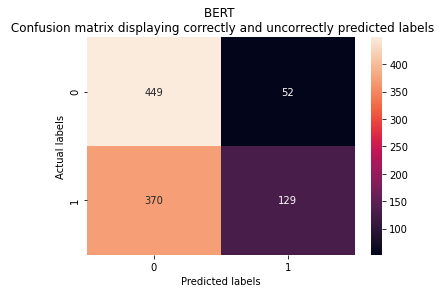

In [39]:
cf_matrix = confusion_matrix(y_actual, pred_set)

plt.title('BERT \n Confusion matrix displaying correctly and uncorrectly predicted labels')
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

In [40]:
not_hateful_labels = BERT_dataset[BERT_dataset['True Label'] == 0]
hateful_labels = BERT_dataset[BERT_dataset['True Label'] == 1]

In [41]:
TP = not_hateful_labels[not_hateful_labels['Label'] == 0]
TN = hateful_labels[hateful_labels['Label'] == 1]
FP = hateful_labels[hateful_labels['Label'] == 0]
FN = not_hateful_labels[not_hateful_labels['Label'] == 1]

In [42]:
print("Number of not hateful correctly classify: ", len(TP))
print("Number of not hateful wrongly classify as hateful: ", len(FN))
print("Number of hateful correctly classify as hateful: ", len(TN))
print("Number of hateful wrongly classify as not hateful: ", len(FP))

Number of not hateful correctly classify:  449
Number of not hateful wrongly classify as hateful:  52
Number of hateful correctly classify as hateful:  129
Number of hateful wrongly classify as not hateful:  370


In [43]:
#Accuracy

Accuracy_ = (len(TP) + len(TN)) / (len(TP) + len(FP) + len(TN) + len(FN))
Accuracy_

0.578

In [44]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision = len(TN) / (len(TN) + len(FN))
print( "The precision score is:", precision)

The precision score is: 0.712707182320442


In [45]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall = len(TN) / (len(TN) + len(FP))
print("The recall score is:", recall)

The recall score is: 0.25851703406813625


In [46]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score = (2 * precision * recall) / (precision + recall)
print("The F1 score is:", F1Score)

The F1 score is: 0.37941176470588234


In [47]:
#Accuracy on not hateful meme
acc_NHM = len(TP) / (len(TP) + len(FN)) * 100
print("Classified ", acc_NHM, "%", "of the not hateful memes")

#Accuracy on not hateful meme
acc_HM = len(TN) / (len(TN) + len(FP)) * 100
print("Classified ", acc_HM, "%", "of the hateful memes")

Classified  89.62075848303394 % of the not hateful memes
Classified  25.851703406813627 % of the hateful memes


# Exploring result in TN dataset

In [48]:
TN

,id,True Label,Label,Proba,Community,Multi/Uni,Text
2,94180,1,1,0.897919,LGBT,uni,happy pride month let's go beat up lesbians
6,5429,1,1,0.580428,Fake News,multi,claims that her ancestors created a safe space...
12,47829,1,1,0.586631,Musulman,multi,when you found your wife is cheating on you ya...
17,38045,1,1,0.564669,Black,multi,i am not racist some of my best slaves are black
20,1865,1,1,0.707008,People of Color,uni,i'm this pretty because both my parents are white
...,...,...,...,...,...,...,...
962,95260,1,1,0.731351,Black,multi,what's black and screams harvey price answerin...
968,20974,1,1,0.792673,Jewish,multi,when mom asks where all the jews went
969,93820,1,1,0.826299,LGBT,uni,we should legally be allowed to shoot fat g*y ...
980,68749,1,1,0.674317,Musulman,multi,"""my name is osama bin laden and this is jackass"""


In [49]:
TN_sortedFrame = TN.sort_values("Proba", ascending=False)
TN_sortedFrame

,id,True Label,Label,Proba,Community,Multi/Uni,Text
753,78163,1,1,0.983789,Musulman,multi,note to americans: we behead gays and brutaliz...
311,41692,1,1,0.980364,Jewish,uni,"when you fart next to the jewish kid, and real..."
259,9357,1,1,0.980364,Jewish,multi,"when you fart next to the jewish kid, and real..."
745,15942,1,1,0.949282,Musulman,uni,radical muslims want to cut your head off mode...
62,64279,1,1,0.935852,Jewish,multi,jew mad? get fuhrererious !
...,...,...,...,...,...,...,...
103,30762,1,1,0.510882,Musulman,multi,muslim women are fighting for freedom and are ...
767,89421,1,1,0.506404,LGBT,uni,"say ""no"" to pride month! it's not only the pro..."
651,38764,1,1,0.505066,Black,multi,there's only one race the human race and that ...
449,97125,1,1,0.504730,Jewish,multi,see? i fuckin told you! little foil on top kee...


In [50]:
TN_sortedFrame.head(20)

,id,True Label,Label,Proba,Community,Multi/Uni,Text
753,78163,1,1,0.983789,Musulman,multi,note to americans: we behead gays and brutaliz...
311,41692,1,1,0.980364,Jewish,uni,"when you fart next to the jewish kid, and real..."
259,9357,1,1,0.980364,Jewish,multi,"when you fart next to the jewish kid, and real..."
745,15942,1,1,0.949282,Musulman,uni,radical muslims want to cut your head off mode...
62,64279,1,1,0.935852,Jewish,multi,jew mad? get fuhrererious !
803,23694,1,1,0.935224,Musulman,uni,"""we will take over politically, oust the const..."
795,57049,1,1,0.935003,Musulman,uni,radical muslims are snakes. moderate muslims a...
157,21530,1,1,0.927811,Musulman,multi,went down on a muslim bitch. her pussy was the...
904,34678,1,1,0.915432,Disable,multi,i hate it when white people throw gang signs t...
95,16592,1,1,0.910987,Black,uni,what's the deal with black people? they're not...


In [51]:
multi_sample_in_TN = TN[TN['Multi/Uni'] == 'multi']
uni_sample_in_TN = TN[TN['Multi/Uni'] == 'uni']

numb_multi_sample_TN = len(multi_sample_in_TN)
numb_uni_sample_TN = len(uni_sample_in_TN)

print("Number of multimodal samples in the dataset: ", numb_multi_sample_TN)
print("Number of unimodal samples in the dataset: ", numb_uni_sample_TN)

Number of multimodal samples in the dataset:  96
Number of unimodal samples in the dataset:  33


It is very surprising to see that the model only correct classify 33 unimodal samples out of the 70 unimodal (text) and hateful - as this number is still small and there is more multimodal sample so the model could have learn from the training set. 
However, statisticly, 47% of the unimodal hateful samples were correctly classified, whereas the multimodal hateful samples were only classified correctly 22% of the time. In other words, the BERT model performed twice as well on the unimodal hateful samples compared to the multimodal hateful samples.

Text(0, 0.5, 'number of sample')

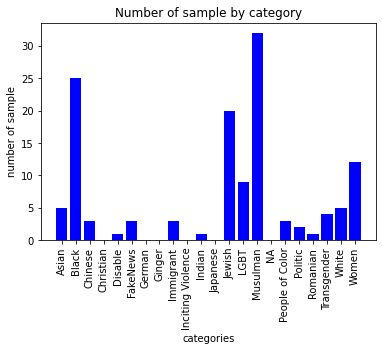

In [52]:
Disable_sample_tn = TN[TN['Community'] == 'Disable']
Women_sample_tn = TN[TN['Community'] == 'Women']
LGBT_sample_tn = TN[TN['Community'] == 'LGBT']
Black_sample_tn = TN[TN['Community'] == 'Black']
Musulman_sample_tn = TN[TN['Community'] == 'Musulman']
FakeNews_sample_tn = TN[TN['Community'] == 'Fake News']
NA_sample_tn = TN[TN['Community'] == 'Not Applicable']
IncitingViolence_sample_tn = TN[TN['Community'] == 'Inciting Violence']
Transgender_sample_tn = TN[TN['Community'] == 'Transgender']
Ginger_sample_tn = TN[TN['Community'] == 'Ginger']
Immigrant_sample_tn = TN[TN['Community'] == 'Immigrant']
Jewish_sample_tn = TN[TN['Community'] == 'Jewish']
PeopleofColor_sample_tn = TN[TN['Community'] == 'People of Color']
White_sample_tn = TN[TN['Community'] == 'White']
Indian_sample_tn = TN[TN['Community'] == 'Indian']
Japanese_sample_tn = TN[TN['Community'] == 'Japanese']
Chinese_sample_tn = TN[TN['Community'] == 'Chinese']
Asian_sample_tn = TN[TN['Community'] == 'Asian']
Politic_sample_tn = TN[TN['Community'] == 'Politic']
German_sample_tn = TN[TN['Community'] == 'German']
Romanian_sample_tn = TN[TN['Community'] == 'Romania']
Christian_sample_tn = TN[TN['Community'] == 'Christian']

TN_categories = {
'Disable' : len(Disable_sample_tn),
'Women' : len(Women_sample_tn),
'LGBT' : len(LGBT_sample_tn),
'Black' : len(Black_sample_tn),
'Musulman' : len(Musulman_sample_tn),
'FakeNews' : len(FakeNews_sample_tn),
'NA' : len(NA_sample_tn),
'Inciting Violence' : len(IncitingViolence_sample_tn),
'Transgender' : len(Transgender_sample_tn),
'Ginger' : len(Ginger_sample_tn),
'Immigrant' : len(Immigrant_sample_tn),
'Jewish' : len(Jewish_sample_tn),
'People of Color' : len(PeopleofColor_sample_tn),
'White' : len(White_sample_tn),
'Indian' : len(Indian_sample_tn),
'Japanese' : len(Japanese_sample_tn),
'Chinese' : len(Chinese_sample_tn),
'Asian' : len(Asian_sample_tn),
'Politic' : len(Politic_sample_tn),
'German' : len(German_sample_tn),
'Romanian' : len(Romanian_sample_tn),
'Christian' : len(Christian_sample_tn)
}

lists = sorted(TN_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [53]:
TN_categories

{'Disable': 1,
 'Women': 12,
 'LGBT': 9,
 'Black': 25,
 'Musulman': 32,
 'FakeNews': 3,
 'NA': 0,
 'Inciting Violence': 0,
 'Transgender': 4,
 'Ginger': 0,
 'Immigrant': 3,
 'Jewish': 20,
 'People of Color': 3,
 'White': 5,
 'Indian': 1,
 'Japanese': 0,
 'Chinese': 3,
 'Asian': 5,
 'Politic': 2,
 'German': 0,
 'Romanian': 1,
 'Christian': 0}

Text(0, 0.5, 'number of sample')

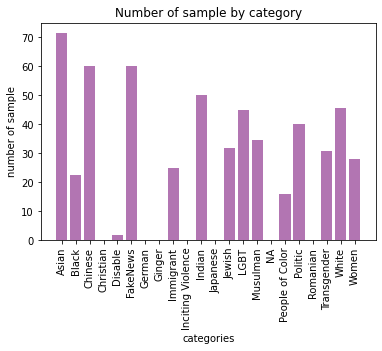

In [54]:
Acc_TN_Disable = len(Disable_sample_tn) / len(Disable_sample_h) * 100
Acc_TN_Women = len(Women_sample_tn) / len(Women_sample_h) * 100
Acc_TN_LGBT = len(LGBT_sample_tn) / len(LGBT_sample_h) * 100
Acc_TN_Black = len(Black_sample_tn) / len(Black_sample_h) * 100
Acc_TN_Musulman = len(Musulman_sample_tn) / len(Musulman_sample_h) * 100
Acc_TN_FakeNews = len(FakeNews_sample_tn) / len(FakeNews_sample_h) * 100
Acc_TN_NA = len(NA_sample_tn) / len(NA_sample_h) * 100
Acc_TN_IncitingViolence = len(IncitingViolence_sample_tn) / len(IncitingViolence_sample_h) * 100
Acc_TN_Transgender = len(Transgender_sample_tn) / len(Transgender_sample_h) * 100
Acc_TN_Ginger = len(Ginger_sample_tn) / len(Ginger_sample_h) * 100
Acc_TN_Immigrant = len(Immigrant_sample_tn) / len(Immigrant_sample_h) * 100
Acc_TN_Jewish = len(Jewish_sample_tn) / len(Jewish_sample_h) * 100
Acc_TN_PeopleofColor = len(PeopleofColor_sample_tn) / len(PeopleofColor_sample_h) * 100
Acc_TN_White = len(White_sample_tn) / len(White_sample_h) * 100
Acc_TN_Indian = len(Indian_sample_tn) / len(Indian_sample_h) * 100
Acc_TN_Japanese = len(Japanese_sample_tn) / len(Japanese_sample_h) * 100
Acc_TN_Chinese = len(Chinese_sample_tn) / len(Chinese_sample_h) * 100
Acc_TN_Asian = len(Asian_sample_tn) / len(Asian_sample_h) * 100
Acc_TN_Politic = len(Politic_sample_tn) / len(Politic_sample_h) * 100
Acc_TN_German = len(German_sample_tn) / len(German_sample_h) * 100
Acc_TN_Romanian = 0
Acc_TN_Christian = len(Christian_sample_tn) / len(Christian_sample_h) * 100


Acc_TN_categories = {
'Disable' : Acc_TN_Disable,
'Women' : Acc_TN_Women,
'LGBT' : Acc_TN_LGBT,
'Black' : Acc_TN_Black,
'Musulman' : Acc_TN_Musulman,
'FakeNews' : Acc_TN_FakeNews,
'NA' : Acc_TN_NA,
'Inciting Violence' : Acc_TN_IncitingViolence,
'Transgender' : Acc_TN_Transgender,
'Ginger' : Acc_TN_Ginger,
'Immigrant' : Acc_TN_Immigrant,
'Jewish' : Acc_TN_Jewish,
'People of Color' : Acc_TN_PeopleofColor,
'White' : Acc_TN_White,
'Indian' : Acc_TN_Indian,
'Japanese' : Acc_TN_Japanese,
'Chinese' : Acc_TN_Chinese,
'Asian' : Acc_TN_Asian,
'Politic' : Acc_TN_Politic,
'German' : Acc_TN_German,
'Romanian' : Acc_TN_Romanian,
'Christian' : Acc_TN_Christian
}

lists = sorted(Acc_TN_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [55]:
for key, value in Acc_TN_categories.items():
    print(key, ':', value, '%')

Disable : 1.8181818181818181 %
Women : 27.906976744186046 %
LGBT : 45.0 %
Black : 22.321428571428573 %
Musulman : 34.40860215053764 %
FakeNews : 60.0 %
NA : 0.0 %
Inciting Violence : 0.0 %
Transgender : 30.76923076923077 %
Ginger : 0.0 %
Immigrant : 25.0 %
Jewish : 31.746031746031743 %
People of Color : 15.789473684210526 %
White : 45.45454545454545 %
Indian : 50.0 %
Japanese : 0.0 %
Chinese : 60.0 %
Asian : 71.42857142857143 %
Politic : 40.0 %
German : 0.0 %
Romanian : 0 %
Christian : 0.0 %


Why Asian where more easy to classify? Is there anything special in the text? Is it a community where the words need to be more explicite to attack them and make the system more keen on noticing them? 
Are Asian and Fake News hate mainly unimodal?

try graph to check those points

In [56]:
# Total number of hateful memes against Asian correctly classify
TN[TN['Community']== 'Disable']

,id,True Label,Label,Proba,Community,Multi/Uni,Text
904,34678,1,1,0.915432,Disable,multi,i hate it when white people throw gang signs t...


In [57]:
# Total number of hateful memes against Asian
Asian_sample_h

,id,True Label,Label,Proba,Community,Multi/Uni,Text
418,30849,1,0,0.415045,Asian,multi,when you finger an asian girl
425,84057,1,1,0.718961,Asian,multi,no little asian don't eat them raw
505,87501,1,1,0.605173,Asian,multi,how to prepare the dog for the family event am...
624,15489,1,0,0.346677,Asian,multi,rice cooker now versus in 1945
667,8567,1,1,0.849058,Asian,multi,"to see better, asians sometime switch to fulls..."
692,69425,1,1,0.718961,Asian,multi,no little asian don't eat them raw
712,50348,1,1,0.687266,Asian,multi,asians be like switching to fullscreen mode


In [58]:
# Total number of hateful Fake News memes correctly classify
TN[TN['Community']== 'Fake News']

,id,True Label,Label,Proba,Community,Multi/Uni,Text
6,5429,1,1,0.580428,Fake News,multi,claims that her ancestors created a safe space...
351,38754,1,1,0.795115,Fake News,multi,'slavery reparations' has there ever been a mo...
772,81964,1,1,0.772609,Fake News,uni,"oprah winfrey: ""old white people need to just ..."


In [59]:
# Total number of hateful Fake News memes
FakeNews_sample_h

,id,True Label,Label,Proba,Community,Multi/Uni,Text
6,5429,1,1,0.580428,Fake News,multi,claims that her ancestors created a safe space...
351,38754,1,1,0.795115,Fake News,multi,'slavery reparations' has there ever been a mo...
393,26910,1,0,0.148768,Fake News,multi,"""they are the biggest terrorists in the histor..."
642,90875,1,0,0.106388,Fake News,uni,"so obama imports 70,000 somali immigrants and ..."
772,81964,1,1,0.772609,Fake News,uni,"oprah winfrey: ""old white people need to just ..."


In [60]:
TN[TN["Community"] == "Transgender"]

,id,True Label,Label,Proba,Community,Multi/Uni,Text
70,89251,1,1,0.875278,Transgender,uni,sorry i'm late. having tranny problems
91,26091,1,1,0.578300,Transgender,multi,no to transphobes give trans people peace
111,51863,1,1,0.784060,Transgender,multi,hey grandma what are you doing ? im sewing a s...
591,19238,1,1,0.638424,Transgender,multi,when did you decide to gender swap? it started...


In [61]:
CorCl = TN_sortedFrame[TN_sortedFrame['Community'] == 'LGBT']
CorCl.sort_values("Proba")
CorCl

,id,True Label,Label,Proba,Community,Multi/Uni,Text
2,94180,1,1,0.897919,LGBT,uni,happy pride month let's go beat up lesbians
969,93820,1,1,0.826299,LGBT,uni,we should legally be allowed to shoot fat g*y ...
859,24658,1,1,0.674104,LGBT,uni,"silly f@ggots, dicks are for chicks get trump'..."
30,83720,1,1,0.593261,LGBT,uni,banging a squirter not fun for a gay man
548,92658,1,1,0.580474,LGBT,multi,i found the lgbt hq straight pride
97,51263,1,1,0.572970,LGBT,multi,gay friends asked for directions told him to g...
341,84670,1,1,0.551149,LGBT,multi,my local mosque is really going all out for ga...
791,42958,1,1,0.523294,LGBT,multi,if you wantto find out if you're gay poop in y...
767,89421,1,1,0.506404,LGBT,uni,"say ""no"" to pride month! it's not only the pro..."


# Exploring result in FP dataset

In [62]:
FP

,id,True Label,Label,Proba,Community,Multi/Uni,Text
0,16395,1,0,0.429417,Disable,multi,handjobs sold seperately
1,37405,1,0,0.489593,Women,multi,introducing fidget spinner for women
3,54321,1,0,0.271455,Black,multi,laughs in [majority of u.s crime rate]
4,97015,1,0,0.385270,Musulman,multi,finds out those 72 virgins.. are goats
5,73506,1,0,0.197662,Musulman,multi,look your dad fucked goats.. i capped him...so...
...,...,...,...,...,...,...,...
988,10234,1,0,0.044021,Black,multi,when you've decided to start a life of crime
989,65948,1,0,0.026274,LGBT,multi,me watching the pride parade
990,86173,1,0,0.063424,Disable,multi,when i said i wanted a little pussy this is no...
991,50839,1,0,0.337216,Musulman,multi,"""you think i'm a terrorist but i identify as a..."


In [63]:
FP_sortedFrame = FP.sort_values("Proba")
FP_sortedFrame.head(20)

,id,True Label,Label,Proba,Community,Multi/Uni,Text
41,42975,1,0,0.012305,Musulman,multi,when you're still fucked from last night's ben...
476,90657,1,0,0.015733,Jewish,multi,feeling cute might write a diary later
989,65948,1,0,0.026274,LGBT,multi,me watching the pride parade
500,19740,1,0,0.028616,Black,multi,where we were where we are from
26,93875,1,0,0.034104,LGBT,uni,we live in a society where they lecture us on ...
80,15473,1,0,0.034651,Disable,multi,i wish i could stand by you!
28,8261,1,0,0.039625,Inciting Violence,multi,life is like belgium some times you just have ...
186,94152,1,0,0.041269,Inciting Violence,multi,we make sacrifices for love and peace in future
863,5978,1,0,0.042738,Black,multi,i think it is safe now challenge accepted
988,10234,1,0,0.044021,Black,multi,when you've decided to start a life of crime


In [64]:
MissCl = FP_sortedFrame[FP_sortedFrame['Community'] == 'Jewish']
MissCl.sort_values("Proba")
MissCl

,id,True Label,Label,Proba,Community,Multi/Uni,Text
476,90657,1,0,0.015733,Jewish,multi,feeling cute might write a diary later
509,89140,1,0,0.048098,Jewish,multi,burning things that don't mean anything to you
513,87532,1,0,0.053443,Jewish,multi,not the shower we deserved but the shower we n...
771,14375,1,0,0.054624,Jewish,multi,wait a sec are u trying to gas me again
205,68594,1,0,0.062033,Jewish,multi,when you make history by locking up you diary
488,51928,1,0,0.063256,Jewish,multi,i could have annihilated all of them but i lef...
328,17904,1,0,0.078507,Jewish,multi,today i feel so hot don't you?
718,29863,1,0,0.088010,Jewish,multi,when your parents ask why the gas bill is so high
243,7396,1,0,0.091589,Jewish,multi,this project is tough but it will save the world
472,45139,1,0,0.121673,Jewish,multi,this is the worst cancer i've ever seen


In [65]:
FP[FP["Community"] == "Transgender"]

,id,True Label,Label,Proba,Community,Multi/Uni,Text
10,43728,1,0,0.384597,Transgender,multi,bruce jenner's cat
71,2789,1,0,0.151258,Transgender,multi,when you got a warrant out for your arrest & y...
378,73049,1,0,0.151463,Transgender,multi,i was asked who my favourite x-men character w...
407,5461,1,0,0.287013,Transgender,uni,"me, an air force intellectual watching some ma..."
463,62509,1,0,0.402599,Transgender,multi,hot sports car for sale includes partially reb...
644,28196,1,0,0.062502,Transgender,multi,"the woman you met who admits she's wrong, apol..."
645,8716,1,0,0.462029,Transgender,multi,for decades bruce fondled her this just in cai...
686,21065,1,0,0.295632,Transgender,uni,i just squirted tranny fluid
935,80231,1,0,0.105091,Transgender,multi,"transrepublican identifies as a republican, bu..."


In [66]:
multi_sample_in_FP = FP[FP['Multi/Uni'] == 'multi']
uni_sample_in_FP = FP[FP['Multi/Uni'] == 'uni']

numb_multi_sample_FP = len(multi_sample_in_FP)
numb_uni_sample_FP = len(uni_sample_in_FP)

print("Number of multimodal samples in the dataset: ", numb_multi_sample_FP)
print("Number of unimodal samples in the dataset: ", numb_uni_sample_FP)

Number of multimodal samples in the dataset:  333
Number of unimodal samples in the dataset:  37


Text(0, 0.5, 'number of sample')

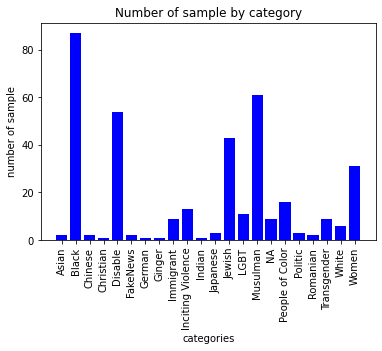

In [67]:
Disable_sample_FP = FP[FP['Community'] == 'Disable']
Women_sample_FP = FP[FP['Community'] == 'Women']
LGBT_sample_FP = FP[FP['Community'] == 'LGBT']
Black_sample_FP = FP[FP['Community'] == 'Black']
Musulman_sample_FP = FP[FP['Community'] == 'Musulman']
FakeNews_sample_FP = FP[FP['Community'] == 'Fake News']
NA_sample_FP = FP[FP['Community'] == 'Not Applicable']
IncitingViolence_sample_FP = FP[FP['Community'] == 'Inciting Violence']
Transgender_sample_FP = FP[FP['Community'] == 'Transgender']
Ginger_sample_FP = FP[FP['Community'] == 'Ginger']
Immigrant_sample_FP = FP[FP['Community'] == 'Immigrant']
Jewish_sample_FP = FP[FP['Community'] == 'Jewish']
PeopleofColor_sample_FP = FP[FP['Community'] == 'People of Color']
White_sample_FP = FP[FP['Community'] == 'White']
Indian_sample_FP = FP[FP['Community'] == 'Indian']
Japanese_sample_FP = FP[FP['Community'] == 'Japanese']
Chinese_sample_FP = FP[FP['Community'] == 'Chinese']
Asian_sample_FP = FP[FP['Community'] == 'Asian']
Politic_sample_FP = FP[FP['Community'] == 'Politic']
German_sample_FP = FP[FP['Community'] == 'German']
Romanian_sample_FP = FP[FP['Community'] == 'Romania']
Christian_sample_FP = FP[FP['Community'] == 'Christian']

FP_categories = {
'Disable' : len(Disable_sample_FP),
'Women' : len(Women_sample_FP),
'LGBT' : len(LGBT_sample_FP),
'Black' : len(Black_sample_FP),
'Musulman' : len(Musulman_sample_FP),
'FakeNews' : len(FakeNews_sample_FP),
'NA' : len(NA_sample_FP),
'Inciting Violence' : len(IncitingViolence_sample_FP),
'Transgender' : len(Transgender_sample_FP),
'Ginger' : len(Ginger_sample_FP),
'Immigrant' : len(Immigrant_sample_FP),
'Jewish' : len(Jewish_sample_FP),
'People of Color' : len(PeopleofColor_sample_FP),
'White' : len(White_sample_FP),
'Indian' : len(Indian_sample_FP),
'Japanese' : len(Japanese_sample_FP),
'Chinese' : len(Chinese_sample_FP),
'Asian' : len(Asian_sample_FP),
'Politic' : len(Politic_sample_FP),
'German' : len(German_sample_FP),
'Romanian' : len(Romanian_sample_FP),
'Christian' : len(Christian_sample_FP)
}

lists = sorted(FP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

Text(0, 0.5, 'number of sample')

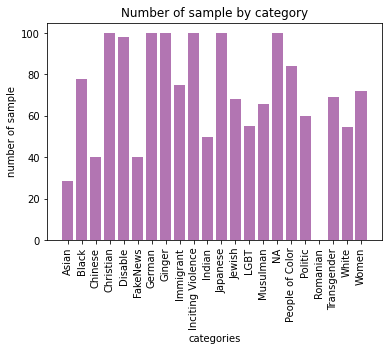

In [68]:
Acc_FP_Disable = len(Disable_sample_FP) / len(Disable_sample_h) * 100
Acc_FP_Women = len(Women_sample_FP) / len(Women_sample_h) * 100
Acc_FP_LGBT = len(LGBT_sample_FP) / len(LGBT_sample_h) * 100
Acc_FP_Black = len(Black_sample_FP) / len(Black_sample_h) * 100
Acc_FP_Musulman = len(Musulman_sample_FP) / len(Musulman_sample_h) * 100
Acc_FP_FakeNews = len(FakeNews_sample_FP) / len(FakeNews_sample_h) * 100
Acc_FP_NA = len(NA_sample_FP) / len(NA_sample_h) * 100
Acc_FP_IncitingViolence = len(IncitingViolence_sample_FP) / len(IncitingViolence_sample_h) * 100
Acc_FP_Transgender = len(Transgender_sample_FP) / len(Transgender_sample_h) * 100
Acc_FP_Ginger = len(Ginger_sample_FP) / len(Ginger_sample_h) * 100
Acc_FP_Immigrant = len(Immigrant_sample_FP) / len(Immigrant_sample_h) * 100
Acc_FP_Jewish = len(Jewish_sample_FP) / len(Jewish_sample_h) * 100
Acc_FP_PeopleofColor = len(PeopleofColor_sample_FP) / len(PeopleofColor_sample_h) * 100
Acc_FP_White = len(White_sample_FP) / len(White_sample_h) * 100
Acc_FP_Indian = len(Indian_sample_FP) / len(Indian_sample_h) * 100
Acc_FP_Japanese = len(Japanese_sample_FP) / len(Japanese_sample_h) * 100
Acc_FP_Chinese = len(Chinese_sample_FP) / len(Chinese_sample_h) * 100
Acc_FP_Asian = len(Asian_sample_FP) / len(Asian_sample_h) * 100
Acc_FP_Politic = len(Politic_sample_FP) / len(Politic_sample_h) * 100
Acc_FP_German = len(German_sample_FP) / len(German_sample_h) * 100
Acc_FP_Romanian = 0
Acc_FP_Christian = len(Christian_sample_FP) / len(Christian_sample_h) * 100


Acc_FP_categories = {
'Disable' : Acc_FP_Disable,
'Women' : Acc_FP_Women,
'LGBT' : Acc_FP_LGBT,
'Black' : Acc_FP_Black,
'Musulman' : Acc_FP_Musulman,
'FakeNews' : Acc_FP_FakeNews,
'NA' : Acc_FP_NA,
'Inciting Violence' : Acc_FP_IncitingViolence,
'Transgender' : Acc_FP_Transgender,
'Ginger' : Acc_FP_Ginger,
'Immigrant' : Acc_FP_Immigrant,
'Jewish' : Acc_FP_Jewish,
'People of Color' : Acc_FP_PeopleofColor,
'White' : Acc_FP_White,
'Indian' : Acc_FP_Indian,
'Japanese' : Acc_FP_Japanese,
'Chinese' : Acc_FP_Chinese,
'Asian' : Acc_FP_Asian,
'Politic' : Acc_FP_Politic,
'German' : Acc_FP_German,
'Romanian' : Acc_FP_Romanian,
'Christian' : Acc_FP_Christian
}

lists = sorted(Acc_FP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [69]:
for key, value in Acc_FP_categories.items():
    print("Fail on", key, 'at', value, '%')

Fail on Disable at 98.18181818181819 %
Fail on Women at 72.09302325581395 %
Fail on LGBT at 55.00000000000001 %
Fail on Black at 77.67857142857143 %
Fail on Musulman at 65.59139784946237 %
Fail on FakeNews at 40.0 %
Fail on NA at 100.0 %
Fail on Inciting Violence at 100.0 %
Fail on Transgender at 69.23076923076923 %
Fail on Ginger at 100.0 %
Fail on Immigrant at 75.0 %
Fail on Jewish at 68.25396825396825 %
Fail on People of Color at 84.21052631578947 %
Fail on White at 54.54545454545454 %
Fail on Indian at 50.0 %
Fail on Japanese at 100.0 %
Fail on Chinese at 40.0 %
Fail on Asian at 28.57142857142857 %
Fail on Politic at 60.0 %
Fail on German at 100.0 %
Fail on Romanian at 0 %
Fail on Christian at 100.0 %


# Exploring result in TP dataset

In [70]:
TP

,id,True Label,Label,Proba,Community,Multi/Uni,Text
7,70691,0,0,0.045991,Not Applicable,Uni,overdose
46,52971,0,0,0.316937,LGBT,multi,that's a man baby!
51,24973,0,0,0.155977,Not Applicable,uni,in england they drive on the left in canada we...
58,18239,0,0,0.373321,Not Applicable,multi,orange is the new black
60,59167,0,0,0.032050,Not Applicable,multi,"i'm not racist, but... racist memes are allowe..."
...,...,...,...,...,...,...,...
995,3869,0,0,0.073661,Not Applicable,multi,a mother's love for the child is a divine thing
996,23817,0,0,0.373033,Not Applicable,uni,sea monkeys
997,56280,0,0,0.200106,Not Applicable,multi,little miss muffet sat on her tuffet
998,29384,0,0,0.152466,Not Applicable,multi,they're in a row


In [71]:
TP[TP["Community"] == "Disable"]

,id,True Label,Label,Proba,Community,Multi/Uni,Text
217,95371,0,0,0.143053,Disable,uni,down syndrome girl put on makeup for a party
522,78956,0,0,0.115518,Disable,multi,"when one of your senses doesn't work, the othe..."
885,28504,0,0,0.085200,Disable,multi,we wouldn't change him for the world. but we w...
895,43127,0,0,0.368091,Disable,multi,"it's taekwondo, not taekwondon't"
977,56430,0,0,0.041783,Disable,multi,"it's not the cards you're dealt, but how you p..."
979,74265,0,0,0.368091,Disable,multi,"it's taekwondo, not taekwondon't"


In [72]:
multi_sample_in_TP = TP[TP['Multi/Uni'] == 'multi']
uni_sample_in_TP = TP[TP['Multi/Uni'] == 'uni']

numb_multi_sample_TP = len(multi_sample_in_TP)
numb_uni_sample_TP = len(uni_sample_in_TP)

print("Number of multimodal samples in the dataset: ", numb_multi_sample_TP)
print("Number of unimodal samples in the dataset: ", numb_uni_sample_TP)

Number of multimodal samples in the dataset:  262
Number of unimodal samples in the dataset:  186


Text(0, 0.5, 'number of sample')

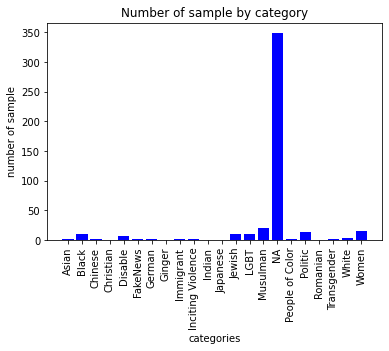

In [73]:
Disable_sample_TP = TP[TP['Community'] == 'Disable']
Women_sample_TP = TP[TP['Community'] == 'Women']
LGBT_sample_TP = TP[TP['Community'] == 'LGBT']
Black_sample_TP = TP[TP['Community'] == 'Black']
Musulman_sample_TP = TP[TP['Community'] == 'Musulman']
FakeNews_sample_TP = TP[TP['Community'] == 'Fake News']
NA_sample_TP = TP[TP['Community'] == 'Not Applicable']
IncitingViolence_sample_TP = TP[TP['Community'] == 'Inciting Violence']
Transgender_sample_TP = TP[TP['Community'] == 'Transgender']
Ginger_sample_TP = TP[TP['Community'] == 'Ginger']
Immigrant_sample_TP = TP[TP['Community'] == 'Immigrant']
Jewish_sample_TP = TP[TP['Community'] == 'Jewish']
PeopleofColor_sample_TP = TP[TP['Community'] == 'People of Color']
White_sample_TP = TP[TP['Community'] == 'White']
Indian_sample_TP = TP[TP['Community'] == 'Indian']
Japanese_sample_TP = TP[TP['Community'] == 'Japanese']
Chinese_sample_TP = TP[TP['Community'] == 'Chinese']
Asian_sample_TP = TP[TP['Community'] == 'Asian']
Politic_sample_TP = TP[TP['Community'] == 'Politic']
German_sample_TP = TP[TP['Community'] == 'German']
Romanian_sample_TP = TP[TP['Community'] == 'Romania']
Christian_sample_TP = TP[TP['Community'] == 'Christian']

TP_categories = {
'Disable' : len(Disable_sample_TP),
'Women' : len(Women_sample_TP),
'LGBT' : len(LGBT_sample_TP),
'Black' : len(Black_sample_TP),
'Musulman' : len(Musulman_sample_TP),
'FakeNews' : len(FakeNews_sample_TP),
'NA' : len(NA_sample_TP),
'Inciting Violence' : len(IncitingViolence_sample_TP),
'Transgender' : len(Transgender_sample_TP),
'Ginger' : len(Ginger_sample_TP),
'Immigrant' : len(Immigrant_sample_TP),
'Jewish' : len(Jewish_sample_TP),
'People of Color' : len(PeopleofColor_sample_TP),
'White' : len(White_sample_TP),
'Indian' : len(Indian_sample_TP),
'Japanese' : len(Japanese_sample_TP),
'Chinese' : len(Chinese_sample_TP),
'Asian' : len(Asian_sample_TP),
'Politic' : len(Politic_sample_TP),
'German' : len(German_sample_TP),
'Romanian' : len(Romanian_sample_TP),
'Christian' : len(Christian_sample_TP)
}

lists = sorted(TP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color='b')
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

Text(0, 0.5, 'number of sample')

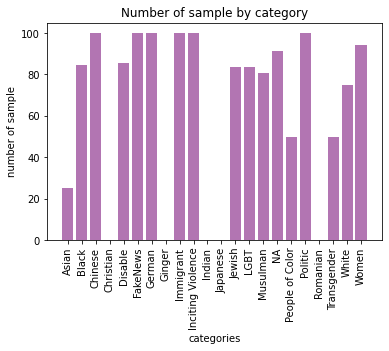

In [74]:
Acc_TP_Disable = len(Disable_sample_TP) / len(Disable_sample_nh) * 100
Acc_TP_Women = len(Women_sample_TP) / len(Women_sample_nh) * 100
Acc_TP_LGBT = len(LGBT_sample_TP) / len(LGBT_sample_nh) * 100
Acc_TP_Black = len(Black_sample_TP) / len(Black_sample_nh) * 100
Acc_TP_Musulman = len(Musulman_sample_TP) / len(Musulman_sample_nh) * 100
Acc_TP_FakeNews = len(FakeNews_sample_TP) / len(FakeNews_sample_nh) * 100
Acc_TP_NA = len(NA_sample_TP) / len(NA_sample_nh) * 100
Acc_TP_IncitingViolence = len(IncitingViolence_sample_TP) / len(IncitingViolence_sample_nh) * 100
Acc_TP_Transgender = len(Transgender_sample_TP) / len(Transgender_sample_nh) * 100
Acc_TP_Ginger = 0
Acc_TP_Immigrant = len(Immigrant_sample_TP) / len(Immigrant_sample_nh) * 100
Acc_TP_Jewish = len(Jewish_sample_TP) / len(Jewish_sample_nh) * 100
Acc_TP_PeopleofColor = len(PeopleofColor_sample_TP) / len(PeopleofColor_sample_nh) * 100
Acc_TP_White = len(White_sample_TP) / len(White_sample_nh) * 100
Acc_TP_Indian = 0
Acc_TP_Japanese = 0
Acc_TP_Chinese = len(Chinese_sample_TP) / len(Chinese_sample_nh) * 100
Acc_TP_Asian = len(Asian_sample_TP) / len(Asian_sample_nh) * 100
Acc_TP_Politic = len(Politic_sample_TP) / len(Politic_sample_nh) * 100
Acc_TP_German = len(German_sample_TP) / len(German_sample_nh) * 100
Acc_TP_Romanian = 0
Acc_TP_Christian = 0


Acc_TP_categories = {
'Disable' : Acc_TP_Disable,
'Women' : Acc_TP_Women,
'LGBT' : Acc_TP_LGBT,
'Black' : Acc_TP_Black,
'Musulman' : Acc_TP_Musulman,
'FakeNews' : Acc_TP_FakeNews,
'NA' : Acc_TP_NA,
'Inciting Violence' : Acc_TP_IncitingViolence,
'Transgender' : Acc_TP_Transgender,
'Ginger' : Acc_TP_Ginger,
'Immigrant' : Acc_TP_Immigrant,
'Jewish' : Acc_TP_Jewish,
'People of Color' : Acc_TP_PeopleofColor,
'White' : Acc_TP_White,
'Indian' : Acc_TP_Indian,
'Japanese' : Acc_TP_Japanese,
'Chinese' : Acc_TP_Chinese,
'Asian' : Acc_TP_Asian,
'Politic' : Acc_TP_Politic,
'German' : Acc_TP_German,
'Romanian' : Acc_TP_Romanian,
'Christian' : Acc_TP_Christian
}

lists = sorted(Acc_TP_categories.items()) # sorted by key, return a list of tuples
categories, numb_of_sample = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(categories, numb_of_sample, color=(0.5,0.1,0.5,0.6))
plt.title('Number of sample by category')
plt.xlabel('categories')
plt.ylabel('number of sample')

In [75]:
for key, value in Acc_TP_categories.items():
    print(key, ':', value, '%')

Disable : 85.71428571428571 %
Women : 94.11764705882352 %
LGBT : 83.33333333333334 %
Black : 84.61538461538461 %
Musulman : 80.76923076923077 %
FakeNews : 100.0 %
NA : 91.36125654450262 %
Inciting Violence : 100.0 %
Transgender : 50.0 %
Ginger : 0 %
Immigrant : 100.0 %
Jewish : 83.33333333333334 %
People of Color : 50.0 %
White : 75.0 %
Indian : 0 %
Japanese : 0 %
Chinese : 100.0 %
Asian : 25.0 %
Politic : 100.0 %
German : 100.0 %
Romanian : 0 %
Christian : 0 %


# Women F1 score

In [76]:
lenght_women_TN = len(TN[TN["Community"] == "Women"])
lenght_women_FN = len(FN[FN["Community"] == "Women"])
lenght_women_FP = len(FP[FP["Community"] == "Women"])

In [77]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_women = lenght_women_TN / (lenght_women_TN + lenght_women_FN)
print( "The precision score is:", precision_women)

The precision score is: 0.9230769230769231


In [78]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_women = lenght_women_TN / (lenght_women_TN + lenght_women_FP)
print("The recall score is:", recall_women)

The recall score is: 0.27906976744186046


In [79]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_women = (2 * precision_women * recall_women) / (precision_women + recall_women)
print("The Women F1 score is:", F1Score_women)

The Women F1 score is: 0.42857142857142855


# Disable F1 score

In [80]:
lenght_Disable_TN = len(TN[TN["Community"] == "Disable"])
lenght_Disable_FN = len(FN[FN["Community"] == "Disable"])
lenght_Disable_FP = len(FP[FP["Community"] == "Disable"])

In [81]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_disable = lenght_Disable_TN / (lenght_Disable_TN + lenght_Disable_FN)
print( "The precision score is:", precision_disable)

The precision score is: 0.5


In [82]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_disable = lenght_Disable_TN / (lenght_Disable_TN + lenght_Disable_FP)
print("The recall score is:", recall_disable)

The recall score is: 0.01818181818181818


In [83]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_disable = (2 * precision_disable * recall_disable) / (precision_disable + recall_disable)
print("The Disable F1 score is:", F1Score_disable)

The Disable F1 score is: 0.03508771929824561


# LGBT F1 score

In [84]:
lenght_LGBT_TN = len(TN[TN["Community"] == "LGBT"])
lenght_LGBT_FN = len(FN[FN["Community"] == "LGBT"])
lenght_LGBT_FP = len(FP[FP["Community"] == "LGBT"])

In [85]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_LGBT = lenght_LGBT_TN / (lenght_LGBT_TN + lenght_LGBT_FN)
print( "The precision score is:", precision_LGBT)

The precision score is: 0.8181818181818182


In [86]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_LGBT = lenght_LGBT_TN / (lenght_LGBT_TN + lenght_LGBT_FP)
print("The recall score is:", recall_LGBT)

The recall score is: 0.45


In [87]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_LGBT = (2 * precision_LGBT * recall_LGBT) / (precision_LGBT + recall_LGBT)
print("The LGBT F1 score is:", F1Score_LGBT)

The LGBT F1 score is: 0.5806451612903226


# Black F1 score

In [88]:
lenght_Black_TN = len(TN[TN["Community"] == "Black"])
lenght_Black_FN = len(FN[FN["Community"] == "Black"])
lenght_Black_FP = len(FP[FP["Community"] == "Black"])

In [89]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Black = lenght_Black_TN / (lenght_Black_TN + lenght_Black_FN)
print( "The precision score is:", precision_Black)

The precision score is: 0.9259259259259259


In [90]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Black = lenght_Black_TN / (lenght_Black_TN + lenght_Black_FP)
print("The recall score is:", recall_Black)

The recall score is: 0.22321428571428573


In [91]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Black = (2 * precision_Black * recall_Black) / (precision_Black + recall_Black)
print("The Black F1 score is:", F1Score_Black)

The Black F1 score is: 0.3597122302158274


# Musulman F1 Score

In [92]:
lenght_Musulman_TN = len(TN[TN["Community"] == "Musulman"])
lenght_Musulman_FN = len(FN[FN["Community"] == "Musulman"])
lenght_Musulman_FP = len(FP[FP["Community"] == "Musulman"])

In [93]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Musulman = lenght_Musulman_TN / (lenght_Musulman_TN + lenght_Musulman_FN)
print( "The precision score is:", precision_Musulman)

The precision score is: 0.8648648648648649


In [94]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Musulman = lenght_Musulman_TN / (lenght_Musulman_TN + lenght_Musulman_FP)
print("The recall score is:", recall_Musulman)

The recall score is: 0.34408602150537637


In [95]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Musulman = (2 * precision_Musulman * recall_Musulman) / (precision_Musulman + recall_Musulman)
print("The Musulman F1 score is:", F1Score_Musulman)

The Musulman F1 score is: 0.49230769230769234


# Transgender F1 Score

In [96]:
lenght_Transgender_TN = len(TN[TN["Community"] == "Transgender"])
lenght_Transgender_FN = len(FN[FN["Community"] == "Transgender"])
lenght_Transgender_FP = len(FP[FP["Community"] == "Transgender"])

In [97]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Transgender = lenght_Transgender_TN / (lenght_Transgender_TN + lenght_Transgender_FN)
print( "The precision score is:", precision_Transgender)

The precision score is: 0.8


In [98]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Transgender = lenght_Transgender_TN / (lenght_Transgender_TN + lenght_Transgender_FP)
print("The recall score is:", recall_Transgender)

The recall score is: 0.3076923076923077


In [99]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Transgender = (2 * precision_Transgender * recall_Transgender) / (precision_Transgender + recall_Transgender)
print("The Transgender F1 score is:", F1Score_Transgender)

The Transgender F1 score is: 0.4444444444444444


# Jewish F1 Score

In [100]:
lenght_Jewish_TN = len(TN[TN["Community"] == "Jewish"])
lenght_Jewish_FN = len(FN[FN["Community"] == "Jewish"])
lenght_Jewish_FP = len(FP[FP["Community"] == "Jewish"])

In [101]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Jewish = lenght_Jewish_TN / (lenght_Jewish_TN + lenght_Jewish_FN)
print( "The precision score is:", precision_Jewish)

The precision score is: 0.9090909090909091


In [102]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Jewish = lenght_Jewish_TN / (lenght_Jewish_TN + lenght_Jewish_FP)
print("The recall score is:", recall_Jewish)

The recall score is: 0.31746031746031744


In [103]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Jewish = (2 * precision_Jewish * recall_Jewish) / (precision_Jewish + recall_Jewish)
print("The Jewish F1 score is:", F1Score_Jewish)

The Jewish F1 score is: 0.4705882352941177


# People of Color F1 Score

In [104]:
lenght_PeopleofColor_TN = len(TN[TN["Community"] == "People of Color"])
lenght_PeopleofColor_FN = len(FN[FN["Community"] == "People of Color"])
lenght_PeopleofColor_FP = len(FP[FP["Community"] == "People of Color"])

In [105]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_PeopleofColor = lenght_PeopleofColor_TN / (lenght_PeopleofColor_TN + lenght_PeopleofColor_FN)
print( "The precision score is:", precision_PeopleofColor)

The precision score is: 0.75


In [106]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_PeopleofColor = lenght_PeopleofColor_TN / (lenght_PeopleofColor_TN + lenght_PeopleofColor_FP)
print("The recall score is:", recall_PeopleofColor)

The recall score is: 0.15789473684210525


In [107]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_PeopleofColor = (2 * precision_PeopleofColor * recall_PeopleofColor) / (precision_PeopleofColor + recall_PeopleofColor)
print("The People of color F1 score is:", F1Score_PeopleofColor)

The People of color F1 score is: 0.2608695652173913


# Graph of F1 Score by categories

In [108]:
F1Score_women_graph = F1Score_women * 100
F1Score_disable_graph = F1Score_disable * 100
F1Score_LGBT_graph = F1Score_LGBT * 100
F1Score_Black_graph = F1Score_Black * 100
F1Score_Musulman_graph = F1Score_Musulman * 100
F1Score_Transgender_graph = F1Score_Transgender * 100
F1Score_Jewish_graph = F1Score_Jewish * 100
F1Score_PeopleofColor_graph = F1Score_PeopleofColor * 100

Text(0, 0.5, 'F1 Score')

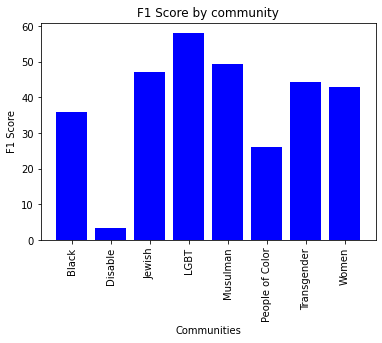

In [109]:
BERT_Graph_categories = {
'Disable' : F1Score_disable_graph,
'Women' : F1Score_women_graph,
'LGBT' : F1Score_LGBT_graph,
'Black' : F1Score_Black_graph,
'Musulman' : F1Score_Musulman_graph,
'Transgender' : F1Score_Transgender_graph,
'Jewish' : F1Score_Jewish_graph,
'People of Color' : F1Score_PeopleofColor_graph
}

lists = sorted(BERT_Graph_categories.items()) # sorted by key, return a list of tuples
communities, numb_of_samples = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(communities, numb_of_samples, color='b')
plt.title('F1 Score by community')
plt.xlabel('Communities')
plt.ylabel('F1 Score')

In [110]:
BERT_Graph_categories

{'Disable': 3.508771929824561,
 'Women': 42.857142857142854,
 'LGBT': 58.06451612903226,
 'Black': 35.97122302158274,
 'Musulman': 49.23076923076923,
 'Transgender': 44.44444444444444,
 'Jewish': 47.05882352941177,
 'People of Color': 26.08695652173913}

In [111]:
multimodel_graph_cat = {
    'Disable': 55.00000000000001,
    'Women': 45.16129032258064,
    'LGBT': 50.0,
    'Black': 53.987730061349694,
    'Musulman': 56.75675675675676,
    'Transgender': 47.05882352941176,
    'Jewish': 70.58823529411765,
    'People of Color': 57.14285714285714}

multimodel_graph_cat

{'Disable': 55.00000000000001,
 'Women': 45.16129032258064,
 'LGBT': 50.0,
 'Black': 53.987730061349694,
 'Musulman': 56.75675675675676,
 'Transgender': 47.05882352941176,
 'Jewish': 70.58823529411765,
 'People of Color': 57.14285714285714}

In [112]:
["Black", 36, 54], ["Disabled", 3, 55], ["Jewish", 47, 70], ["LGBT", 58, 50], ["Muslim", 49, 56], ["People of color", 26, 57],
["Transgender", 44, 47], ["Women", 43, 45]

(['Transgender', 44, 47], ['Women', 43, 45])

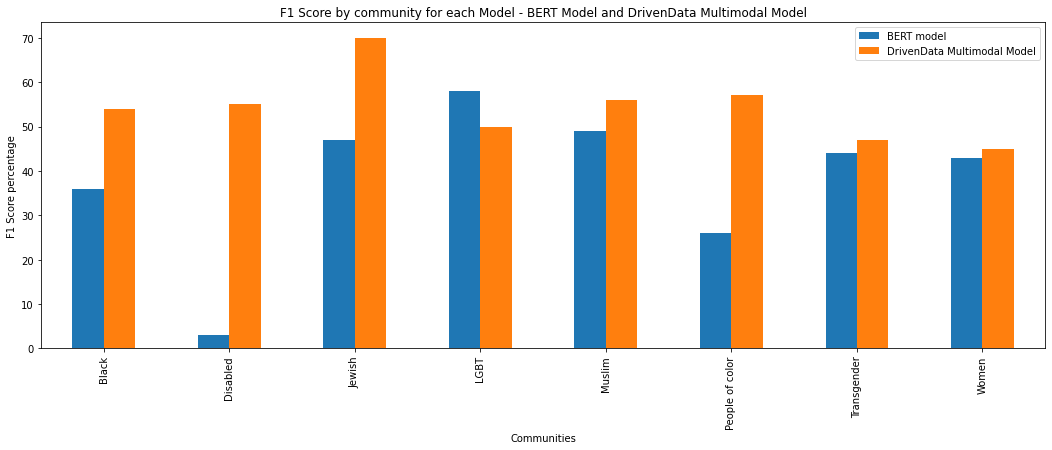

In [113]:
data_cat=[
    ["Black", 36, 54], ["Disabled", 3, 55], ["Jewish", 47, 70], ["LGBT", 58, 50], ["Muslim", 49, 56], ["People of color", 26, 57],
["Transgender", 44, 47], ["Women", 43, 45]
     ]

df_cat=pd.DataFrame(data_cat,columns=["Communities", "BERT model", "DrivenData Multimodal Model"])
df_cat.plot(x="Communities", y=["BERT model", "DrivenData Multimodal Model"], kind="bar",figsize=(18,6))
plt.title("F1 Score by community for each Model - BERT Model and DrivenData Multimodal Model")
plt.ylabel("F1 Score percentage")
plt.show()

# Graph F1 Score Uni / Multi / All

In [114]:
uniFrame_TN = TN[TN['Multi/Uni'] == 'uni']
uniFrame_FN = FN[FN['Multi/Uni'] == 'uni']
uniFrame_FP = FP[FP['Multi/Uni'] == 'uni']

MultiFrame_TN = TN[TN['Multi/Uni'] == 'multi']
MultiFrame_FN = FN[FN['Multi/Uni'] == 'multi']
MultiFrame_FP = FP[FP['Multi/Uni'] == 'multi']

Uni

In [115]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_uni = len(uniFrame_TN) / (len(uniFrame_TN) + len(uniFrame_FN))
print( "The uni precision score is:", precision_uni)

The uni precision score is: 0.6346153846153846


In [116]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_uni = len(uniFrame_TN) / (len(uniFrame_TN) + len(uniFrame_FP))
print("The uni recall score is:", recall_uni)

The uni recall score is: 0.4714285714285714


In [117]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_uni = (2 * precision_uni * recall_uni) / (precision_uni + recall_uni)
print("The Uni F1 score is:", F1Score_uni)

The Uni F1 score is: 0.540983606557377


Multi

In [118]:
# precision is the ratio of correctly predicted hateful memes to all pedicted hateful (so 129 and the wrong classified 52)
#precision = TN / (TN + FN)

precision_Multi = len(MultiFrame_TN) / (len(MultiFrame_TN) + len(MultiFrame_FN))
print( "The uni precision score is:", precision_Multi)

The uni precision score is: 0.7441860465116279


In [119]:
# recall is the ratio of correctly predicted hateful to all actual hateful (so 129 over the entire hateful meme in the dataset)
#recall = TN / (TN + FP)

recall_Multi = len(MultiFrame_TN) / (len(MultiFrame_TN) + len(MultiFrame_FP))
print("The uni recall score is:", recall_Multi)

The uni recall score is: 0.22377622377622378


In [120]:
#F1 score
#The problem of the accuracy is that this metric doesn't represent well the performance of the model on both classes 

F1Score_Multi = (2 * precision_Multi * recall_Multi) / (precision_Multi + recall_Multi)
print("The Uni F1 score is:", F1Score_Multi)

The Uni F1 score is: 0.3440860215053763


In [121]:
F1Score_uni = F1Score_uni * 100
F1Score_multi = F1Score_Multi * 100
F1Score_all = F1Score * 100

Text(0, 0.5, 'F1 Score')

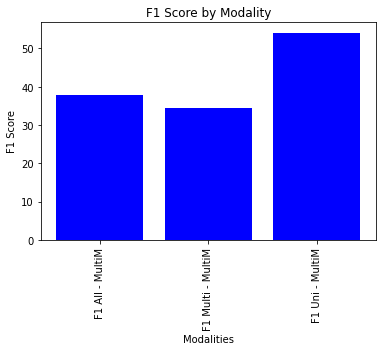

In [122]:
BERT_F1_score = {
    'F1 Uni - MultiM' : F1Score_uni,
    'F1 Multi - MultiM' : F1Score_multi,
    'F1 All - MultiM' : F1Score_all
}

lists = sorted(BERT_F1_score.items()) # sorted by key, return a list of tuples
communities, numb_of_samples = zip(*lists) # unpack a list of pairs into two tuples

plt.xticks(rotation='vertical')
df = plt.bar(communities, numb_of_samples, color='b')
plt.title('F1 Score by Modality')
plt.xlabel('Modalities')
plt.ylabel('F1 Score')

In [123]:
BERT_F1_score

{'F1 Uni - MultiM': 54.0983606557377,
 'F1 Multi - MultiM': 34.40860215053763,
 'F1 All - MultiM': 37.94117647058823}

In [124]:
Multi_model_F1Score = {
    'F1 Uni - MultiM': 33.91812865497076,
    'F1 Multi - MultiM': 50.98039215686274,
    'F1 All - MultiM': 47.68361581920904}

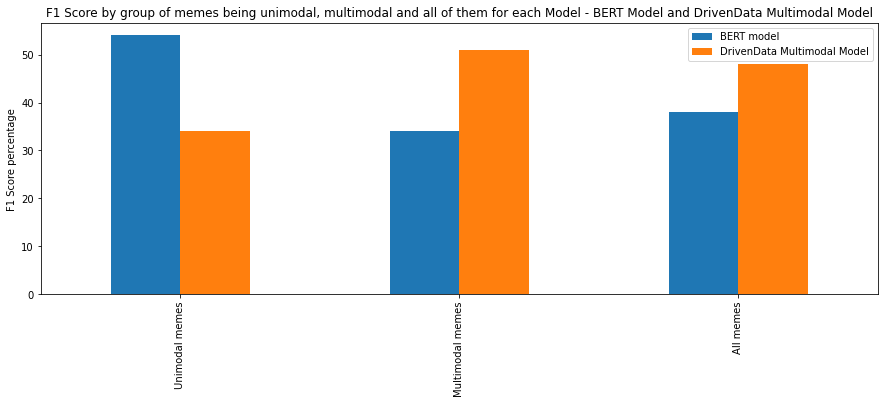

In [125]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch


data=[["Unimodal memes",54, 34],
      ["Multimodal memes",34, 51],
      ["All memes",38, 48],
     ]


df=pd.DataFrame(data,columns=[" ", "BERT model", "DrivenData Multimodal Model"])

df.plot(x=" ", y=["BERT model", "DrivenData Multimodal Model"], kind="bar",figsize=(15,5))

plt.title("F1 Score by group of memes being unimodal, multimodal and all of them for each Model - BERT Model and DrivenData Multimodal Model")
plt.ylabel("F1 Score percentage")
plt.show()